# Q3

In [261]:
import torch
from torch import nn
import pandas as pd
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np

In [41]:
df_train = pd.read_csv('train_data.txt')
df_test = pd.read_csv('test_data.txt')

In [42]:
#df_test.columns
df_train = df_train.drop(['date'], axis=1)
df_test = df_test.drop(['date'], axis = 1)
df_train.shape[0]

8143

## (A)

In [50]:
# Layer sizes!
n_input = 5
H = 5 # Hidden layer size, not specified!
n_output = 1

In [195]:
# Sigmoid fxn on output: <0.5: Class '0', >0.5: class '1'
class Network(nn.Module):
    def __init__(self, H):
        super().__init__()
        
        self.hidden = nn.Linear(5, H)
        self.out = nn.Linear(H, 1)
           
        # activation function for hidden layer.
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.out(x)
        x = self.sigmoid(x)
        
        return x
    

### Training

In [225]:
criterion = nn.BCELoss()
trainset = torch.Tensor(df_train.values)

testset_without_labels = torch.Tensor(df_test.values[:,:-1])
testset_labels = torch.Tensor(df_test.values[:,-1])

In [226]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=df_train.shape[0], shuffle=True)
m = Network(3)
# Optimizers require the parameters to optimize and a learning rate
optimizer = torch.optim.SGD(m.parameters(), lr=0.05)

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images in trainloader:
        #print(images.shape)
        x = images[:,:-1]
        labels = (images[:,-1])
        
        # Training pass
        optimizer.zero_grad()
        
        output = m(x)
#         print(output.shape)
        
        loss = criterion(output[:,0], labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5399089455604553
Training loss: 0.5381625294685364
Training loss: 0.5364841818809509
Training loss: 0.5350092649459839
Training loss: 0.5336318612098694
Training loss: 0.5323793292045593
Training loss: 0.5311557054519653
Training loss: 0.5300919413566589
Training loss: 0.5291462540626526
Training loss: 0.5282082557678223


## (B)

Establishing baseline accuracy.

In [229]:
# Need to apply sigmoid on these random predictions, do so directly with BCEWithLogitsLoss
criterion_b = nn.BCEWithLogitsLoss()

import random
rand_preds = []

for i in range(df_test.shape[0]):
    p = 0
    for j in range(5):
        p+=random.randint(0,1)
    if p>=3:
        rand_preds.append(1)
    else:
        rand_preds.append(0)

base_error = criterion_b(torch.Tensor(rand_preds ), testset_labels)
print(base_error.item())

0.893871009349823


In [250]:
# pred, target are vectors : pred has been activated by sigmoid function!
def percentCorrect(pred, target):
    assert(len(pred)== len(target))
    cnt = 0
    for i in range(len(pred)):
        pClass = 0
        if(pred[i] >= 0.5):
            pClass = 1
        if(pClass == target[i]):
            cnt += 1
            
    return cnt/len(pred)

### The baseline error is 0.8927

## (C)

H = 5, Batch Size = 100

In [315]:
c3_batchSize = 100;
trainloader = torch.utils.data.DataLoader(trainset, batch_size=c3_batchSize, shuffle=True)

tol = 0.0001

m = Network(5)
# Optimizers require the parameters to optimize and a learning rate
optimizer = torch.optim.SGD(m.parameters(), lr=0.004)

correct_class_train = 0

train_losses = []

epochs = 150

labels = []
output = []
for e in range(epochs):
    running_loss = 0
    old_r_loss = 100000
    running_correct = 0
    for images in trainloader:
        #print(images.shape)
        x = images[:,:-1]
        labels = (images[:,-1])
        
        # Training pass
        optimizer.zero_grad()
        
        output = m(x)
        #print(labels.type)
        
        loss = criterion(output[:,0], labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
#         running_correct += percentCorrect(output[:,0], labels)
    if (e % 5)==0:
        
        #print(f"Training loss: {running_loss/len(trainloader)}")
#         np.append(train_losses,running_loss/len(trainloader)
        train_losses.append(running_loss/len(trainloader))
            
        
running_correct += percentCorrect(m(trainset[:,:-1]), trainset[:,-1])

print(f"Training % Correct : {100*running_correct}")


Training % Correct : 93.14748864055016


In [299]:
import matplotlib.pyplot as plt
import numpy as np

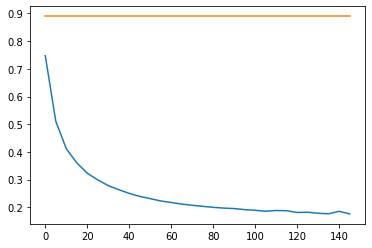

In [316]:
v = epochs/5
x = np.arange(v)
x = x*5
plt.plot(x, train_losses)
plt.plot(x, np.full(int(v), 0.89))
plt.show()

### Classifying test data

In [320]:
correct_class_test = percentCorrect(m(testset_without_labels), testset_labels)

print(f"Test % Correct : {100*correct_class_test}")

Test % Correct : 94.28835110746515


### Observation
Percent Training Data Classified correctly at the end of the training: 93.147

Percent Test Data Classified correctly: 94.288

Learning Rate: 0.004

Batch Size: 100

## (D) Batch Gradient Descent

In [321]:
c3_batchSize = df_train.shape[0];
trainloader = torch.utils.data.DataLoader(trainset, batch_size=c3_batchSize, shuffle=True)

tol = 0.0001

m = Network(5)
# Optimizers require the parameters to optimize and a learning rate
optimizer = torch.optim.SGD(m.parameters(), lr=0.004)

correct_class_train = 0

train_losses = []

epochs = 150

labels = []
output = []
for e in range(epochs):
    running_loss = 0
    old_r_loss = 100000
    running_correct = 0
    for images in trainloader:
        #print(images.shape)
        x = images[:,:-1]
        labels = (images[:,-1])
        
        # Training pass
        optimizer.zero_grad()
        
        output = m(x)
        #print(labels.type)
        
        loss = criterion(output[:,0], labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
#         running_correct += percentCorrect(output[:,0], labels)
    if (e % 5)==0:
        
        #print(f"Training loss: {running_loss/len(trainloader)}")
#         np.append(train_losses,running_loss/len(trainloader)
        train_losses.append(running_loss/len(trainloader))
            
        
running_correct += percentCorrect(m(trainset[:,:-1]), trainset[:,-1])

print(f"Training % Correct : {100*running_correct}")


Training % Correct : 78.76703917475132


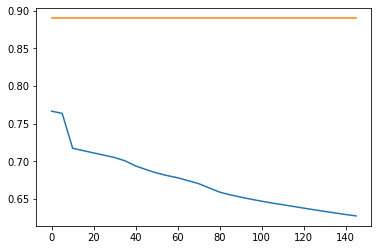

In [322]:
v = epochs/5
x = np.arange(v)
x = x*5
plt.plot(x, train_losses)
plt.plot(x, np.full(int(v), 0.89))
plt.show()

The performance decreases.

## (E)



In [337]:
train_perf = []
test_perf = []

In [338]:
def doer(H):
    c3_batchSize = 100;
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=c3_batchSize, shuffle=True)

    tol = 0.0001

    m = Network(H)
    # Optimizers require the parameters to optimize and a learning rate
    optimizer = torch.optim.Adam(m.parameters(), lr=0.004)

    correct_class_train = 0

    train_losses = []

    epochs = 250

    labels = []
    output = []
    for e in range(epochs):
        running_loss = 0
        old_r_loss = 100000.0
        running_correct = 0
        for images in trainloader:
            #print(images.shape)
            x = images[:,:-1]
            labels = (images[:,-1])

            # Training pass
            optimizer.zero_grad()

            output = m(x)
            #print(labels.type)

            loss = criterion(output[:,0], labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
    #         running_correct += percentCorrect(output[:,0], labels)
        if (e % 5)==0:
            if(running_loss/len(trainloader)>old_r_loss):
                break
            #print(f"Training loss: {running_loss/len(trainloader)}")
    #         np.append(train_losses,running_loss/len(trainloader)
            #train_losses.append(running_loss/len(trainloader))


    running_correct += percentCorrect(m(trainset[:,:-1]), trainset[:,-1])

    print(f"Training % Correct : {100*running_correct}")
    
    correct_class_test = percentCorrect(m(testset_without_labels), testset_labels)

    print(f"Test % Correct : {100*correct_class_test}")
    
    return 100*running_correct, 100*correct_class_test

### H = 1

In [339]:
a, b = doer(1)
train_perf.append(a)
test_perf.append(b)

Training % Correct : 78.76703917475132
Test % Correct : 78.98892534864643


### H = 2

In [340]:
a, b = doer(2)
train_perf.append(a)
test_perf.append(b)

Training % Correct : 78.76703917475132
Test % Correct : 78.98892534864643


### H = 5

In [341]:
a, b = doer(5)
train_perf.append(a)
test_perf.append(b)

Training % Correct : 98.75967088296697
Test % Correct : 98.62592288761279


### H = 10


In [342]:
a, b = doer(10)
train_perf.append(a)
test_perf.append(b)

Training % Correct : 98.87019525973228
Test % Correct : 99.2616899097621


### H = 20

In [343]:
a, b = doer(20)
train_perf.append(a)
test_perf.append(b)

Training % Correct : 98.87019525973228
Test % Correct : 99.08736669401148


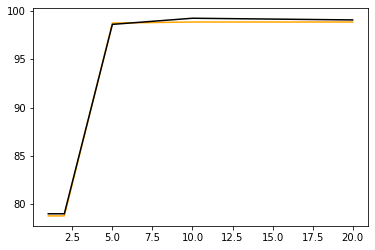

In [350]:
# train perf is in orange
# test perf is in black
x = [1,2,5,10,20]
plt.plot(x, train_perf, 'orange')
plt.plot(x, test_perf, 'black')

plt.show()

The performance increases rapidly with increase in the number of hidden layers!

## (F) Using MSE

In [351]:
def doer2(H):
    criterionF = nn.MSELoss()
    
    c3_batchSize = 100;
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=c3_batchSize, shuffle=True)

    tol = 0.0001

    m = Network(H)
    # Optimizers require the parameters to optimize and a learning rate
    optimizer = torch.optim.Adam(m.parameters(), lr=0.004)

    correct_class_train = 0

    train_losses = []

    epochs = 250

    labels = []
    output = []
    for e in range(epochs):
        running_loss = 0
        old_r_loss = 100000.0
        running_correct = 0
        for images in trainloader:
            #print(images.shape)
            x = images[:,:-1]
            labels = (images[:,-1])

            # Training pass
            optimizer.zero_grad()

            output = m(x)
            #print(labels.type)

            loss = criterionF(output[:,0], labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
    #         running_correct += percentCorrect(output[:,0], labels)
        if (e % 5)==0:
            if(running_loss/len(trainloader)>old_r_loss):
                break
            #print(f"Training loss: {running_loss/len(trainloader)}")
    #         np.append(train_losses,running_loss/len(trainloader)
            #train_losses.append(running_loss/len(trainloader))


    running_correct += percentCorrect(m(trainset[:,:-1]), trainset[:,-1])

    print(f"Training % Correct : {100*running_correct}")
    
    correct_class_test = percentCorrect(m(testset_without_labels), testset_labels)

    print(f"Test % Correct : {100*correct_class_test}")
    
    return 100*running_correct, 100*correct_class_test

In [354]:
train_perf = []
test_perf = []
a, b = doer(1)
train_perf.append(a)
test_perf.append(b)

a, b = doer(2)
train_perf.append(a)
test_perf.append(b)

a, b = doer(5)
train_perf.append(a)
test_perf.append(b)

a, b = doer(10)
train_perf.append(a)
test_perf.append(b)

a, b = doer(20)
train_perf.append(a)
test_perf.append(b)

Training % Correct : 78.76703917475132
Test % Correct : 78.98892534864643
Training % Correct : 98.808792828196
Test % Correct : 99.33347005742412
Training % Correct : 98.83335380081051
Test % Correct : 99.11812961443806
Training % Correct : 98.83335380081051
Test % Correct : 99.08736669401148
Training % Correct : 98.84563428711776
Test % Correct : 98.17473338802297


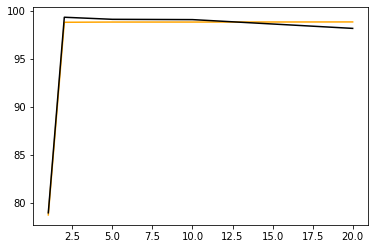

In [355]:
# train perf is in orange
# test perf is in black
x = [1,2,5,10,20]
plt.plot(x, train_perf, 'orange')
plt.plot(x, test_perf, 'black')

plt.show()

The accuracy percentage decreases slightly.

### (G)

In [385]:
# Sigmoid fxn on output: <0.5: Class '0', >0.5: class '1'
class Network2(nn.Module):
    def __init__(self, H1, H2):
        super().__init__()
        
        self.hidden1 = nn.Linear(5, H1)
        self.hidden2 = nn.Linear(H1, H2)
        
        self.out = nn.Linear(H2, 1)
           
        # activation function for hidden layer.
        self.sigmoid = nn.Sigmoid()
        self.rel = nn.ReLU()
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.sigmoid(x)
        x = self.hidden2(x)
        x = self.sigmoid(x)
        x = self.out(x)
        x = self.sigmoid(x)
        
        return x
    

In [393]:
c3_batchSize = 100;
trainloader = torch.utils.data.DataLoader(trainset, batch_size=c3_batchSize, shuffle=True)

tol = 0.0001

m3 = Network2(20, 8)
# Optimizers require the parameters to optimize and a learning rate
optimizer = torch.optim.Adam(m.parameters(), lr=0.004)

correct_class_train = 0

train_losses = []

epochs = 150

labels = []
output = []
for e in range(epochs):
    running_loss = 0
    old_r_loss = 100000
    running_correct = 0
    for images in trainloader:
        #print(images.shape)
        x = images[:,:-1]
        labels = (images[:,-1])
        
        # Training pass
        optimizer.zero_grad()
        
        output = m3(x)
        #print(labels.type)
        
        loss = criterion(output[:,0], labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
#         running_correct += percentCorrect(output[:,0], labels)
    if (e % 5)==0:
        
        #print(f"Training loss: {running_loss/len(trainloader)}")
#         np.append(train_losses,running_loss/len(trainloader)
        train_losses.append(running_loss/len(trainloader))
            
        
running_correct = percentCorrect(m3(trainset[:,:-1]), trainset[:,-1])

print(f"Training % Correct : {100*running_correct}")

correct_class_test = percentCorrect(m3(testset_without_labels), testset_labels)

print(f"Test % Correct : {100*correct_class_test}")

Training % Correct : 78.76703917475132
Test % Correct : 78.98892534864643


Tried :
* 5-6-3-1
* 5-5-2-1
* 5-4-2-1
* 5-20-8-1

Single hidden layer performs better.